## About Dataset

### Context
- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

- The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

- Zalando seeks to replace the original MNIST dataset

### Content
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

- To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
- For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


### Labels

- Each training and test example is assigned to one of the following labels:

    - 0 T-shirt/top
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot


### TL;DR

- Each row is a separate image
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255)

#### t-SNE Task:
#### Question:
- You're given a dataset of grayscale images of clothing (t-shirts, shoes, bags, etc.).
- Your task is to use t-SNE to reduce the 784-dimensional pixel data into 2D space and visualize how well it separates different fashion categories.
 
#### Instructions:
- Load the Fashion MNIST dataset (or provide .csv version from Kaggle).
 
- Flatten the image data (each image = 784 features).
 
- Apply PCA first to reduce noise and speed up t-SNE.
 
- Use t-SNE to project into 2D.
 
- Visualize the result using a scatter plot with colors for clothing labels.
 
- Comment on how well the clusters are separated.
 
- (Bonus) Try different perplexity values and see the effect.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
# Load the dataset
df = pd.read_csv("fashion-mnist_train.csv")

In [6]:
# Extract features and labels
X = df.drop(columns=['label'])
y = df['label']

In [7]:
# Standardize the pixel values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Apply PCA to reduce dimensions before t-SNE (e.g., to 50 components)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

In [10]:
# Create a DataFrame for visualization
tsne_df = pd.DataFrame({'TSNE1': X_tsne[:,0], 'TSNE2': X_tsne[:,1], 'Label': y})

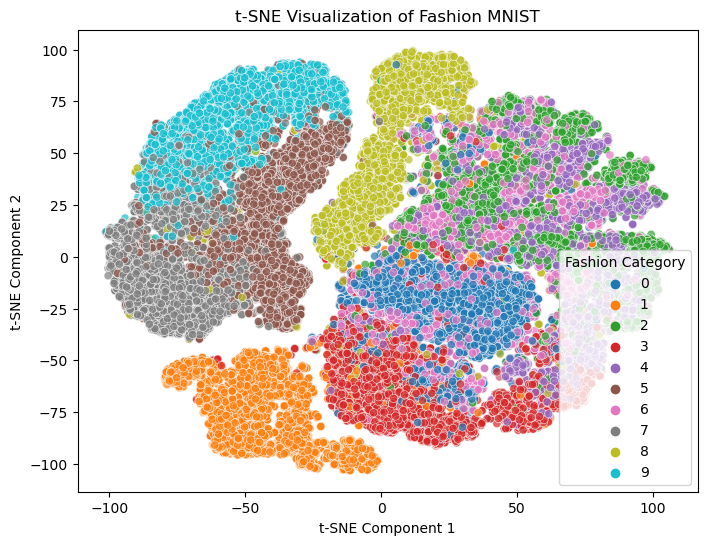

In [11]:
# Scatter plot of t-SNE results
plt.figure(figsize=(8,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Label', palette='tab10', data=tsne_df, alpha=0.7)
plt.title('t-SNE Visualization of Fashion MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Fashion Category')
plt.show()